哈摟，各位資料科學家大家好，我是來自於台北市"頭期款不足"的阿宏，我想買房子很久了，但是不知道要買哪個地方，想先從內政部不動產交易時價登入資料中先了解行情，我現在手邊蒐集了台北市Taipei(A_lvr_land_A.csv)、新北市New_Taipei(F_lvr_land_A.csv)、台中市Taichung(B_lvr_land_A.csv)、高雄市Kaohsiung(E_lvr_land_A.csv)共四份資料，請各位資料科學家幫幫忙分析了。

# 1.不動產資料檔案讀取並串接

資料分散在4個資料，先合併成一個資料方便後續分析，但是我發現有英文欄位跟中文欄位，留下中文刪除英文，並加入新的欄位用以分辨台北市Taipei、新北市New_Taipei、台中市Taichung、高雄市Kaohsiung

1. 利用Pandas中的pd.read_csv()分別讀取A_lvr_land_A.csv、B_lvr_land_A.csv、E_lvr_land_A.csv、F_lvr_land_A.csv
2. 刪除csv中第二列英文翻譯，The villages and towns urban district,transaction sign,land sector position building sector house number plate,land shifting total area square meter,....
3. 生成city欄位其中以地區分類台北市Taipei(A_lvr_land_A.csv)、新北市New_Taipei(F_lvr_land_A.csv)、台中市Taichung(B_lvr_land_A.csv)、高雄市Kaohsiung(E_lvr_land_A.csv)
4. 將以上四份資料運用pd.concat()串接

In [36]:
import pandas as pd 

In [37]:
#1.利用Pandas中的pd.read_csv()分別讀取A_lvr_land_A.csv、B_lvr_land_A.csv、E_lvr_land_A.csv、F_lvr_land_A.csv
dataTaipei = pd.read_csv('A_lvr_land_A.csv')
dataNewTaipei = pd.read_csv('F_lvr_land_A.csv')
dataTaichung = pd.read_csv('B_lvr_land_A.csv')
dataKaohsing = pd.read_csv('E_lvr_land_A.csv')

C:\Users\Eddy\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (3,7,14,15,16,17,18,21,22,24,25) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [38]:
#2.刪除csv中第二列英文翻譯，The villages and towns urban district,transaction sign,land sector position building sector house number plate,land shifting total area square meter,....
dataTaipei = dataTaipei.drop(0)
dataNewTaipei = dataNewTaipei.drop(0)
dataTaichung = dataTaichung.drop(0)
dataKaohsing = dataKaohsing.drop(0)

In [39]:
#3. 生成city欄位其中以地區分類台北市Taipei(A_lvr_land_A.csv)、新北市New_Taipei(F_lvr_land_A.csv)、台中市Taichung(B_lvr_land_A.csv)、高雄市Kaohsiung(E_lvr_land_A.csv)
dataTaipei['area'] = 'Taipei'
dataNewTaipei['area'] = 'NewTaipei'
dataTaichung['area'] = 'Taichung'
dataKaohsing['area'] = 'Kaohsing'

In [40]:
#4. 將以上四份資料運用pd.concat()串接
data = pd.concat([dataTaipei,dataNewTaipei,dataTaichung,dataKaohsing],axis=0,join='inner')
data = data.reset_index(drop=True)
data

,鄉鎮市區,交易標的,土地區段位置建物區段門牌,土地移轉總面積平方公尺,都市土地使用分區,非都市土地使用分區,非都市土地使用編定,交易年月日,交易筆棟數,移轉層次,...,車位類別,車位移轉總面積(平方公尺),車位總價元,備註,編號,主建物面積,附屬建物面積,陽台面積,電梯,area
0,文山區,房地(土地+建物)+車位,臺北市文山區忠順街二段85巷1~30號,26.97,住,NaN,NaN,1090406,土地1建物1車位2,四層,...,坡道平面,40.7,0,含增建或未登記建物。;內含獨立產權車位，未包含在棟數內。,RPVOMLMKNHPFFAA18CA,110.91,9.63,11.09,NaN,Taipei
1,文山區,房地(土地+建物),臺北市文山區福興路91~120號,10.32,住,NaN,NaN,1090317,土地1建物1車位0,三層,...,NaN,0.0,0,含增建或未登記建物。;,RPPPMLMKNHPFFAA67CA,24.58,1.28,2.30,NaN,Taipei
2,文山區,房地(土地+建物),臺北市文山區木柵路四段121~150號,39.64,其他,NaN,NaN,1090418,土地2建物1車位0,六層,...,NaN,0.0,0,NaN,RPSPMLMKNHPFFAA97CA,78.80,4.15,8.76,NaN,Taipei
3,中正區,房地(土地+建物),臺北市中正區和平西路一段31~60號,4.26,商,NaN,NaN,1090413,土地2建物1車位0,九層,...,NaN,0.0,0,含增建或未登記建物。;,RPPOMLMKNHPFFAA57CA,18.34,0.00,6.45,NaN,Taipei
4,文山區,房地(土地+建物),臺北市文山區樟新街56巷1~30號,44.57,住,NaN,NaN,1090328,土地3建物1車位0,四層,...,NaN,0.0,0,含增建或未登記建物。;,RPWNMLNKNHPFFAA28CA,98.74,2.26,11.84,NaN,Taipei
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59471,三民區,房地(土地+建物),建興路380巷1弄1~30號,32.0,其他,NaN,NaN,1090727,土地1建物1車位0,四層,...,NaN,0.0,0,NaN,RPSPMLLLQHPFFDE09DA,101.29,0.00,7.12,NaN,Kaohsing
59472,三民區,房地(土地+建物)+車位,民族巷1~30號,7.01,其他,NaN,NaN,1090816,土地1建物1車位1,十三層,...,坡道平面,6.25,800000,NaN,RPPQMLKLQHPFFDE78DA,51.16,9.73,0.00,NaN,Kaohsing
59473,三民區,房地(土地+建物)+車位,大豐一路331~360號,27.23,其他,NaN,NaN,1090722,土地1建物1車位1,三層,...,坡道機械,0.0,0,NaN,RPSOMLSKQHPFFDE96DA,101.03,6.24,0.00,NaN,Kaohsing
59474,三民區,房地(土地+建物)+車位,民族巷31~60號,10.32,其他,NaN,NaN,1090731,土地1建物1車位1,十層,...,坡道機械,26.06,0,NaN,RPWNMLLKQHPFFDE56DA,80.00,7.89,0.00,NaN,Kaohsing


# 2. 資料清理與切片

因為我是想買來住的房子，所以幫忙刪除住宿用途以外的資料，並且限制
1. 交易年月日，限制在109年
2. 建物現況格局-房，1~5間 
3. 建物現況格局-廳，1~2廳

以下columns_mapping、analysis_columns、columns_type提供給資料科學家配合使用
1. 利用.rename()並配合以下columns_mapping，將原中文欄位名稱改為英文方便之後分析
2. 取出主要用途(main_use)為'住家用'以及都市土地使用分區(use_zoning)為'住'的資料並針對以下欄位analysis_columns做分析並去除na值
   (提示:先取完之後再.dropna())
3. 觀察欄位資料型態，並利用.astype()搭配以下提供的columns_type做欄位型態轉換
4. 做資料切片將<br>
    新增欄位交易年月日(tx_dt_year)，從交易年月日(tx_dt)萃取出年份<br>
    1.交易年月日(tx_dt_year)，限制在109年<br>
    2.建物現況格局-房(room_number)，限制在1到5間<br>
    3.建物現況格局-廳(hall_number)，限制在1到2廳<br>
    4.最後運用.reset_index()重新定義索引

In [41]:
columns_mapping = {'鄉鎮市區':'towns',
'交易標的':'transaction_sign',
'土地區段位置建物區段門牌':'house_number',
'土地移轉總面積平方公尺':'land_area_square_meter', 
'都市土地使用分區':'use_zoning', 
'非都市土地使用分區':'land_use_district',
'非都市土地使用編定':'land_use',
'交易年月日':'tx_dt', 
 '交易筆棟數':'transaction_pen_number', 
 '移轉層次':'shifting_level', 
 '總樓層數':'total_floor_number', 
 '建物型態':'building_state', 
 '主要用途':'main_use', 
 '主要建材':'main_materials',
 '建築完成年月':'complete_date', 
 '建物移轉總面積平方公尺':'building_area_square_meter', 
 '建物現況格局-房':'room_number', 
 '建物現況格局-廳':'hall_number', 
 '建物現況格局-衛':'health_number', 
'建物現況格局-隔間':'compartmented_number', 
 '有無管理組織':'manages', 
 '總價元':'total_price', 
 '單價元平方公尺':'unit_price', 
 '車位類別':'berth_category', 
 '車位移轉總面積(平方公尺)':'berth_area_square_meter',
'車位總價元':'berth_price', 
 '備註':'note', 
 '編號':'serial_number', 
 '主建物面積':'main_building_area', 
 '附屬建物面積':'auxiliary_building_area', 
 '陽台面積':'balcony_area', 
 '電梯':'elevator'
                  }
analysis_columns = ['towns','main_use','use_zoning','total_price','building_area_square_meter',
                                     'main_building_area',
                                     'tx_dt','unit_price','room_number','hall_number','health_number']
columns_type = {'total_price': 'int','unit_price':'float','building_area_square_meter':'float',
                                      'main_building_area': 'float',
                                      'room_number': 'int','hall_number': 'int','health_number': 'int'}

In [42]:
#1. 利用.rename()並配合以下columns_mapping，將原中文欄位名稱改為英文方便之後分析
new_data = data.rename(columns = columns_mapping)
new_data.head(3)

,towns,transaction_sign,house_number,land_area_square_meter,use_zoning,land_use_district,land_use,tx_dt,transaction_pen_number,shifting_level,...,berth_category,berth_area_square_meter,berth_price,note,serial_number,main_building_area,auxiliary_building_area,balcony_area,elevator,area
0,文山區,房地(土地+建物)+車位,臺北市文山區忠順街二段85巷1~30號,26.97,住,NaN,NaN,1090406,土地1建物1車位2,四層,...,坡道平面,40.7,0,含增建或未登記建物。;內含獨立產權車位，未包含在棟數內。,RPVOMLMKNHPFFAA18CA,110.91,9.63,11.09,NaN,Taipei
1,文山區,房地(土地+建物),臺北市文山區福興路91~120號,10.32,住,NaN,NaN,1090317,土地1建物1車位0,三層,...,NaN,0.0,0,含增建或未登記建物。;,RPPPMLMKNHPFFAA67CA,24.58,1.28,2.30,NaN,Taipei
2,文山區,房地(土地+建物),臺北市文山區木柵路四段121~150號,39.64,其他,NaN,NaN,1090418,土地2建物1車位0,六層,...,NaN,0.0,0,NaN,RPSPMLMKNHPFFAA97CA,78.80,4.15,8.76,NaN,Taipei


In [43]:
#2. 取出主要用途(main_use)為'住家用'以及都市土地使用分區(use_zoning)為'住'的資料並針對以下欄位analysis_columns做分析並去除na值 (提示:先取完之後再.dropna())
#   (提示:先取完之後再.dropna())
new_data = new_data.loc[(new_data.main_use=='住家用')&(new_data.use_zoning=='住')]
new_data.loc[:,analysis_columns].dropna()

,towns,main_use,use_zoning,total_price,building_area_square_meter,main_building_area,tx_dt,unit_price,room_number,hall_number,health_number
0,文山區,住家用,住,36000000,229.91,110.91,1090406,156583,3,2,2
1,文山區,住家用,住,5580000,37.31,24.58,1090317,149558,2,1,1
4,文山區,住家用,住,18280000,123.66,98.74,1090328,147825,3,2,2
6,文山區,住家用,住,8000000,124.25,90.78,1090417,64386,3,1,2
7,文山區,住家用,住,2200000,30.16,26.15,1090417,72944,5,2,2
...,...,...,...,...,...,...,...,...,...,...,...
57267,路竹區,住家用,住,5300000,140.10999999999999,86.24,1090718,37827,3,2,2
57361,路竹區,住家用,住,5050000,144.76,101.76,1090802,34885,3,2,2
57578,茄萣區,住家用,住,2720000,210.78,144.40,1090725,12904,5,2,3
57626,路竹區,住家用,住,4950000,94.48,94.48,1090726,52392,3,2,2


In [44]:
#3. 觀察欄位資料型態，並利用.astype()搭配以下提供的columns_type做欄位型態轉換
df_interested = new_data.astype(columns_type)
df_interested.info()
df_interested.head(2)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7818 entries, 0 to 57834
Data columns (total 33 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   towns                       7818 non-null   object 
 1   transaction_sign            7818 non-null   object 
 2   house_number                7818 non-null   object 
 3   land_area_square_meter      7818 non-null   object 
 4   use_zoning                  7818 non-null   object 
 5   land_use_district           1 non-null      object 
 6   land_use                    0 non-null      object 
 7   tx_dt                       7818 non-null   object 
 8   transaction_pen_number      7818 non-null   object 
 9   shifting_level              7818 non-null   object 
 10  total_floor_number          7812 non-null   object 
 11  building_state              7818 non-null   object 
 12  main_use                    7818 non-null   object 
 13  main_materials              7817

,towns,transaction_sign,house_number,land_area_square_meter,use_zoning,land_use_district,land_use,tx_dt,transaction_pen_number,shifting_level,...,berth_category,berth_area_square_meter,berth_price,note,serial_number,main_building_area,auxiliary_building_area,balcony_area,elevator,area
0,文山區,房地(土地+建物)+車位,臺北市文山區忠順街二段85巷1~30號,26.97,住,NaN,NaN,1090406,土地1建物1車位2,四層,...,坡道平面,40.7,0,含增建或未登記建物。;內含獨立產權車位，未包含在棟數內。,RPVOMLMKNHPFFAA18CA,110.91,9.63,11.09,NaN,Taipei
1,文山區,房地(土地+建物),臺北市文山區福興路91~120號,10.32,住,NaN,NaN,1090317,土地1建物1車位0,三層,...,NaN,0.0,0,含增建或未登記建物。;,RPPPMLMKNHPFFAA67CA,24.58,1.28,2.30,NaN,Taipei


In [65]:
#4. 做資料切片將
#     新增欄位交易年月日(tx_dt_year)，從交易年月日(tx_dt)萃取出年份
#     1.交易年月日(tx_dt_year)，限制在109年
#     2.建物現況格局-房(room_number)，限制在1到5間
#     3.建物現況格局-廳(hall_number)，限制在1到2廳
#     4.最後運用.reset_index()重新定義索引

df_interested['tx_dt_year'] = df_interested['tx_dt'].apply(lambda x:x[0:3])
df_interested = df_interested[df_interested['tx_dt_year']=='109']
df_interested = df_interested[(df_interested['room_number']>=1) & (df_interested['room_number']<=5)]
df_interested = df_interested[(df_interested['hall_number']>=1) & (df_interested['hall_number']<=2)]
df_interested.reset_index(inplace=True,drop=True)

# 3. 建立自定義特徵加入分析


以台灣來說大家都是以坪為單位計算使用面積，應該是不會問說你家有幾平方公尺吧?，但是偏偏資料中沒有以坪為單位計算，所以接下來請各位幫忙產生新的欄位以坪為單位計算面積，轉換公式我也幫你找好了，在下面的定義。<br>
定義 : 1平方公尺相當於0.3025坪 <br>
建立新特徵
1. 建物移轉總面積坪(building_area_square_feet) : 建物移轉總面積平方公尺\*0.3025
2. 主建物面積坪(main_building_area_square_feet) : 主建物面積\*0.3025
3. 單價元坪(unit_price_square_feet) : 單價元平方公尺/0.3025

可以利用.describe()做一下資料觀察，是否有奇怪的資料?<br>
如果有請將資料移除，並說明為什麼移除此資料?<br>
移除後再用.describe()觀察是否還有奇怪的資料?

In [68]:
# 建立新特徵
# 1. 建物移轉總面積坪(building_area_square_feet) : 建物移轉總面積平方公尺*0.3025
# 2. 主建物面積坪(main_building_area_square_feet) : 主建物面積*0.3025
# 3. 單價元坪(unit_price_square_feet) : 單價元平方公尺/0.3025
df_interested['building_area_square_feet'] = df_interested['building_area_square_meter']*0.3025
df_interested['main_building_area_square_feet'] = df_interested['main_building_area']*0.3025
df_interested['unit_price_square_feet'] = df_interested['unit_price']/0.3025

In [90]:
# 可以利用.describe()做一下資料觀察，是否有奇怪的資料?
# 如果有請將資料移除，並說明為什麼移除此資料?
df_interested.describe()

df_interested.drop( df_interested[df_interested['unit_price']==0].index,inplace =True )
df_interested.drop( df_interested[df_interested['total_price']==0].index,inplace =True )
df_interested.drop( df_interested[df_interested['main_building_area']==0].index,inplace =True )


In [91]:
# 移除後再用.describe()觀察是否還有奇怪的資料?
df_interested.describe()


,building_area_square_meter,room_number,hall_number,health_number,total_price,unit_price,main_building_area,auxiliary_building_area,balcony_area,building_area_square_feet,main_building_area_square_feet,unit_price_square_feet
count,6854.000000,6854.000000,6854.000000,6854.000000,6.854000e+03,6854.000000,6854.000000,6854.000000,6854.000000,6854.000000,6854.000000,6.854000e+03
mean,121.768404,2.849869,1.793114,1.733149,1.141669e+07,94548.453020,82.565725,4.908439,5.118968,36.834942,24.976132,3.125569e+05
std,62.849105,0.898343,0.405103,0.680869,1.161669e+07,58374.690321,36.940424,7.792733,6.072088,19.011854,11.174478,1.929742e+05
min,7.440000,1.000000,1.000000,0.000000,4.100000e+05,3239.000000,7.440000,0.000000,0.000000,2.250600,2.250600,1.070744e+04
25%,83.012500,2.000000,2.000000,1.000000,5.600000e+06,53597.250000,61.062500,0.000000,0.000000,25.111281,18.471406,1.771810e+05
50%,109.405000,3.000000,2.000000,2.000000,8.600000e+06,79742.500000,79.110000,1.180000,3.010000,33.095012,23.930775,2.636116e+05
75%,147.445000,3.000000,2.000000,2.000000,1.330000e+07,118880.000000,95.970000,8.357500,9.487500,44.602112,29.030925,3.929917e+05
max,1444.950000,5.000000,2.000000,6.000000,2.250000e+08,610104.000000,335.760000,154.100000,48.130000,437.097375,101.567400,2.016873e+06


# 4. 找出台北市時價登入總價高度相關的變數

阿宏我是台北人他想找出影響台北市總價、單價元坪的因子<br>
相關係數0.3以下為低相關，0.3\~0.7為中等相關，0.7以上為高度相關<br>
1. 資料切片切出city欄位為台北市的資料，並找出時價登入總價(total_price)高度相關的變數
2. 資料切片切出city欄位為台北市的資料，找出單價元坪(unit_price_square_feet)高度相關的變數

In [96]:
# 阿宏我是台北人他想找出影響台北市總價、單價元坪的因子
# 1. 資料切片切出city欄位為台北市的資料，並找出時價登入總價(total_price)高度相關的變數

# 2. 資料切片切出city欄位為台北市的資料，找出單價元坪(unit_price_square_feet)高度相關的變數

df_interested.loc[df_interested.area=='Taipei'].corr()[['total_price','unit_price_square_feet']]


,total_price,unit_price_square_feet
building_area_square_meter,0.864627,0.218185
room_number,0.326441,-0.100062
hall_number,0.270787,0.004883
health_number,0.598832,0.128217
total_price,1.000000,0.581290
unit_price,0.581290,1.000000
main_building_area,0.710515,0.112488
auxiliary_building_area,0.231765,0.079600
balcony_area,0.464666,0.015001
building_area_square_feet,0.864627,0.218185


# 5. 資料視覺化並解釋


我想要以視覺化的方式來看房價資料，並且請各位資料科學家解釋圖表給阿宏我知道
1. 以城市(city)為x軸，以單價元坪(unit_price_square_feet)為y軸畫出boxplot，並找出單價元坪(unit_price_square_feet)中位數最高的地區
2. 進一步對台北市的資料做圖，以建物現況格局-房(room_number)為x軸，以總價元(total_price)為y軸畫出boxplot，並找出總價元(total_price)中位數最高的房間數。hint:資料切片找出city欄位為台北市的資料，再進一步畫圖
3. 對台北市的資料做圖，先將地區(twons)做編碼在進行，再以地區(twon)為x軸，以單價元坪(unit_price_square_feet)為y軸畫出boxplot，並找出單價元坪(unit_price_square_feet)中位數最高的地區。hint:運用LabelEncoder()對地區(twons)做編碼，運用.inverse_transform()反查編碼的地區

C:\Users\Eddy\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)


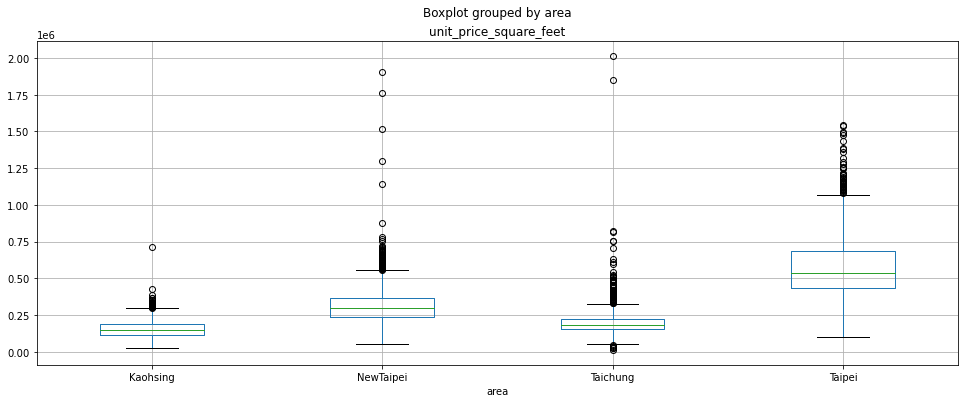

In [98]:
#1. 以城市(city)為x軸，以單價元坪(unit_price_square_feet)為y軸畫出boxplot，並找出單價元坪(unit_price_square_feet)中位數最高的地區
df_interested.boxplot(column=['unit_price_square_feet'],by='area',figsize=(16,6))

C:\Users\Eddy\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)


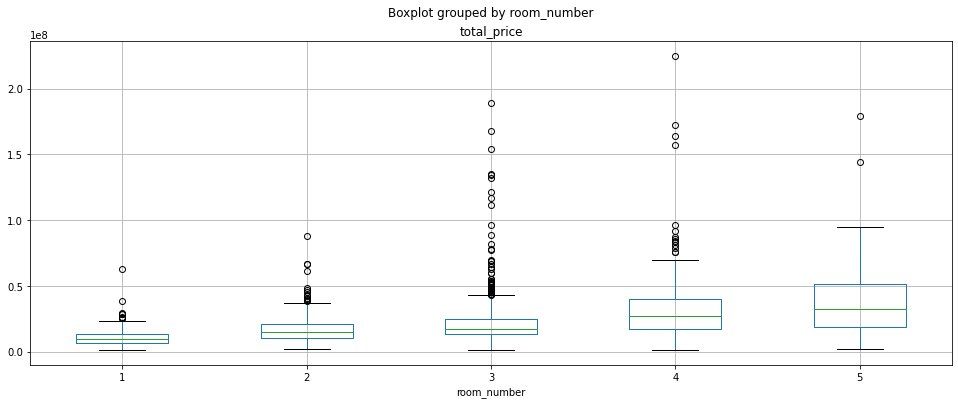

In [103]:
#2. 進一步對台北市的資料做圖，以建物現況格局-房(room_number)為x軸，以總價元(total_price)為y軸畫出boxplot，並找出總價元(total_price)中位數最高的房間數。hint:資料切片找出city欄位為台北市的資料，再進一步畫圖
df_interested.loc[df_interested.area=='Taipei'].boxplot(column=['total_price'],by='room_number',figsize=(16,6))

C:\Users\Eddy\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)


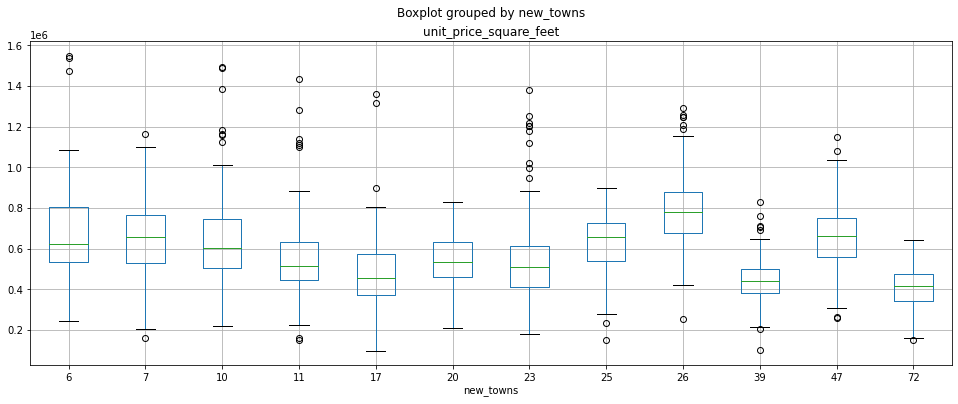

In [117]:
#3. 對台北市的資料做圖，先將地區(twons)做編碼在進行，再以地區(twon)為x軸，以單價元坪(unit_price_square_feet)為y軸畫出boxplot，並找出單價元坪(unit_price_square_feet)中位數最高的地區。
# hint:運用LabelEncoder()對地區(twons)做編碼，運用.inverse_transform()反查編碼的地區
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder().fit(df_interested['towns'].values)
df_interested['new_towns'] = le.transform(df_interested['towns'].values)
df_interested.loc[df_interested.area=='Taipei'].boxplot(column=['unit_price_square_feet'],by='new_towns',figsize=(16,6))

In [118]:
le.inverse_transform([10])

array(['信義區'], dtype=object)